In [44]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)
len(train_data)
len(test_data)

2246

In [45]:
#解碼單字
word_index=reuters.get_word_index()
reverse_word_index=dict( [ (value,key)for(key,value)in word_index.items() ] )
decoded_newswire=''.join( [reverse_word_index.get(i - 3,'?')for i in train_data[0] ] )

In [46]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        results[i,sequences]=1.
        return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

model=Sequential()
model.add(Dense(64, input_shape=(10000,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [49]:
#從train分割驗證集
partial_x_train=x_train[1000:]
partial_y_train=one_hot_train_labels[1000:]

x_val=x_train[:1000]
y_val=one_hot_train_labels[:1000]

In [50]:
md=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 156us/sample - loss: 3.8119 - acc: 0.1531 - val_loss: 3.7979 - val_acc: 0.3530
Epoch 2/20
7982/7982 [==============================] - 1s 116us/sample - loss: 3.7881 - acc: 0.3300 - val_loss: 3.7770 - val_acc: 0.3530
Epoch 3/20
7982/7982 [==============================] - 1s 124us/sample - loss: 3.7677 - acc: 0.3514 - val_loss: 3.7571 - val_acc: 0.3530
Epoch 4/20
7982/7982 [==============================] - 1s 110us/sample - loss: 3.7478 - acc: 0.3514 - val_loss: 3.7373 - val_acc: 0.3530
Epoch 5/20
7982/7982 [==============================] - 1s 112us/sample - loss: 3.7280 - acc: 0.3514 - val_loss: 3.7177 - val_acc: 0.3530
Epoch 6/20
7982/7982 [==============================] - 1s 113us/sample - loss: 3.7084 - acc: 0.3514 - val_loss: 3.6983 - val_acc: 0.3530
Epoch 7/20
7982/7982 [==============================] - 1s 111us/sample - loss: 3.6889 - acc: 0.3514 - val_loss: 3.6790 - va

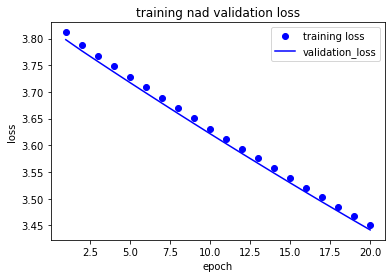

In [51]:
import matplotlib.pyplot as plt
loss=md.history['loss']
val_loss=md.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation_loss')
plt.title("training nad validation loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [53]:
prediction=model.predict(x_test)

In [55]:
prediction[0].shape

(46,)

In [57]:
np.sum(prediction[0])

0.99999994

In [58]:
np.argmax(prediction)

4